# **Justifying Image Removal (Corrupted/Duplicates)**

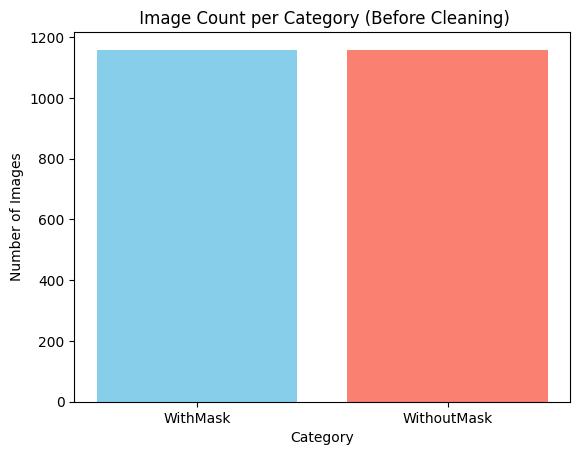

🔹 Total images before cleaning: 2318
{'WithMask': 1159, 'WithoutMask': 1159}


Checking WithoutMask: 100%|██████████| 1159/1159 [00:19<00:00, 58.65it/s]


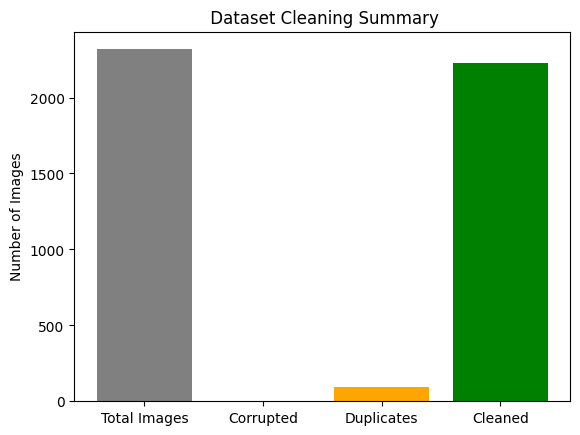

🔹 Cleaning Summary: {'Total Images': 2318, 'Corrupted': 0, 'Duplicates': 91, 'Cleaned': 2227}


In [1]:
import os
import cv2
import hashlib
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import zipfile

dataset_path = "/kaggle/input/face-mask-dataset/dataset"
categories = ["WithMask", "WithoutMask"]

cleaned_path = "/kaggle/working/CleanedDataset"
os.makedirs(cleaned_path, exist_ok=True)

category_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in categories}

plt.bar(category_counts.keys(), category_counts.values(), color=['skyblue', 'salmon'])
plt.title(" Image Count per Category (Before Cleaning)")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.show()

print("🔹 Total images before cleaning:", sum(category_counts.values()))
print(category_counts)

total_images = 0
corrupted_images = 0
duplicate_images = 0
hash_set = set()

for category in categories:
    src_folder = os.path.join(dataset_path, category)
    dst_folder = os.path.join(cleaned_path, category)
    os.makedirs(dst_folder, exist_ok=True)

    for file in tqdm(os.listdir(src_folder), desc=f"Checking {category}"):
        file_path = os.path.join(src_folder, file)
        total_images += 1

       
        try:
            img = cv2.imread(file_path)
            if img is None:
                corrupted_images += 1
                continue
        except:
            corrupted_images += 1
            continue

     
        with open(file_path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()

        if file_hash in hash_set:
            duplicate_images += 1
            continue
        else:
            hash_set.add(file_hash)

     
        shutil.copy(file_path, dst_folder)

cleaned_total = total_images - corrupted_images - duplicate_images



summary = {
    "Total Images": total_images,
    "Corrupted": corrupted_images,
    "Duplicates": duplicate_images,
    "Cleaned": cleaned_total
}


plt.bar(summary.keys(), summary.values(), color=['gray', 'red', 'orange', 'green'])
plt.title(" Dataset Cleaning Summary")
plt.ylabel("Number of Images")
plt.show()

print("🔹 Cleaning Summary:", summary)


# **Resize Images** 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


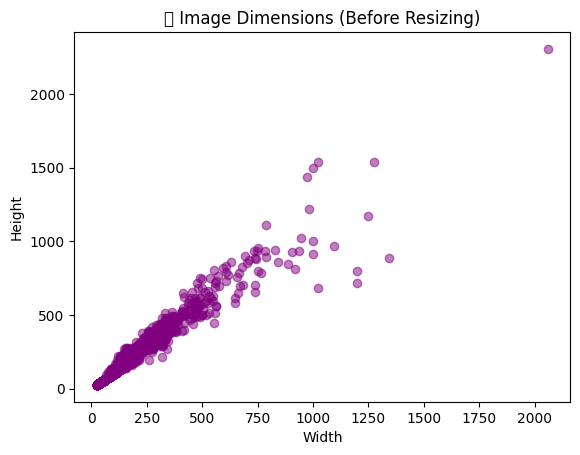

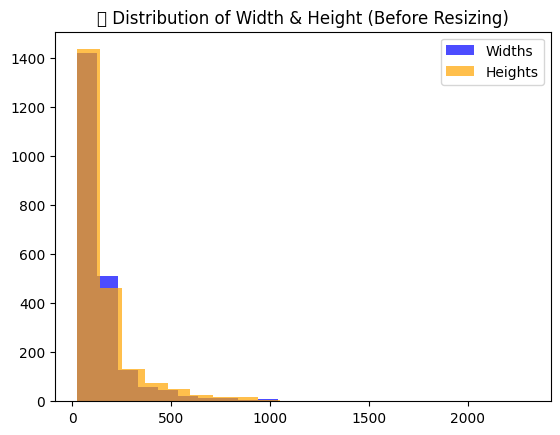

Resizing WithoutMask: 100%|██████████| 1159/1159 [00:05<00:00, 225.47it/s]


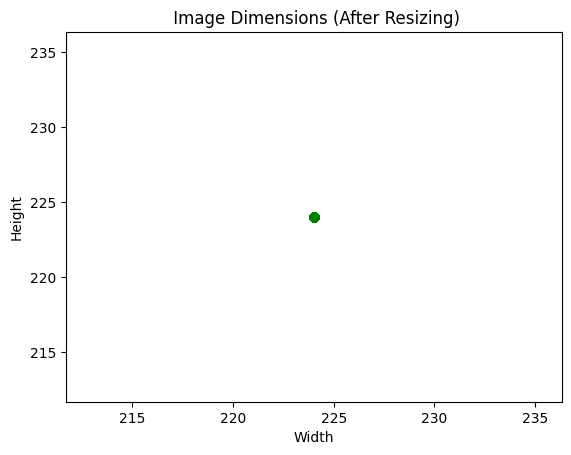

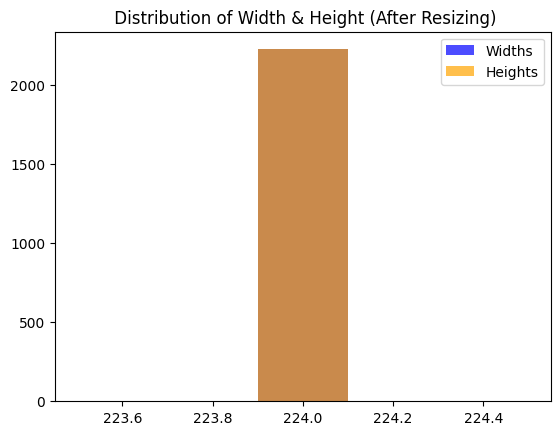

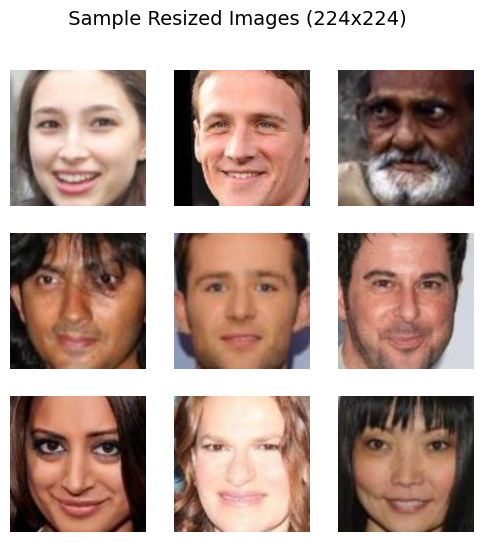

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tqdm import tqdm
import zipfile
import random


cleaned_path = "/kaggle/working/CleanedDataset"
resized_path = "/kaggle/working/ResizedDataset"
os.makedirs(resized_path, exist_ok=True)

target_size = (224, 224)  


widths = []
heights = []

for category in os.listdir(cleaned_path):
    src_folder = os.path.join(cleaned_path, category)
    dst_folder = os.path.join(resized_path, category)
    os.makedirs(dst_folder, exist_ok=True)

    for file in os.listdir(src_folder):
        file_path = os.path.join(src_folder, file)
        img = cv2.imread(file_path)
        if img is not None:
            h, w = img.shape[:2]
            widths.append(w)
            heights.append(h)


plt.scatter(widths, heights, alpha=0.5, color="purple")
plt.title("📊 Image Dimensions (Before Resizing)")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


plt.hist(widths, bins=20, color='blue', alpha=0.7, label="Widths")
plt.hist(heights, bins=20, color='orange', alpha=0.7, label="Heights")
plt.title("📊 Distribution of Width & Height (Before Resizing)")
plt.legend()
plt.show()


for category in os.listdir(cleaned_path):
    src_folder = os.path.join(cleaned_path, category)
    dst_folder = os.path.join(resized_path, category)

    for file in tqdm(os.listdir(src_folder), desc=f"Resizing {category}"):
        file_path = os.path.join(src_folder, file)
        img = cv2.imread(file_path)

        if img is not None:
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(os.path.join(dst_folder, file), resized_img)


resized_widths = []
resized_heights = []

for category in os.listdir(resized_path):
    folder = os.path.join(resized_path, category)
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file))
        if img is not None:
            h, w = img.shape[:2]
            resized_widths.append(w)
            resized_heights.append(h)


plt.scatter(resized_widths, resized_heights, alpha=0.5, color="green")
plt.title(" Image Dimensions (After Resizing)")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


plt.hist(resized_widths, bins=5, color='blue', alpha=0.7, label="Widths")
plt.hist(resized_heights, bins=5, color='orange', alpha=0.7, label="Heights")
plt.title(" Distribution of Width & Height (After Resizing)")
plt.legend()
plt.show()


sample_category = random.choice(os.listdir(resized_path))
sample_folder = os.path.join(resized_path, sample_category)
sample_files = random.sample(os.listdir(sample_folder), min(9, len(os.listdir(sample_folder))))

plt.figure(figsize=(6,6))
for i, file in enumerate(sample_files):
    img = cv2.imread(os.path.join(sample_folder, file))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i+1)
    plt.imshow(img_rgb)
    plt.axis("off")
plt.suptitle(" Sample Resized Images (224x224)", fontsize=14)
plt.show()

# **Convert RGB Colors & Normalization**

2025-09-26 18:35:13.478335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758911713.863814      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758911713.976168      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


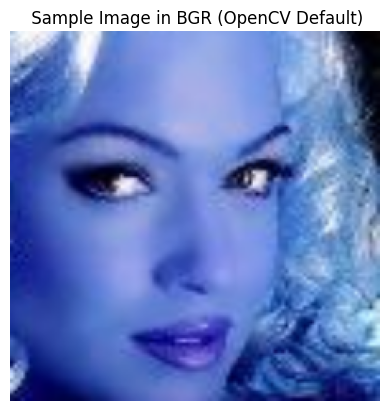

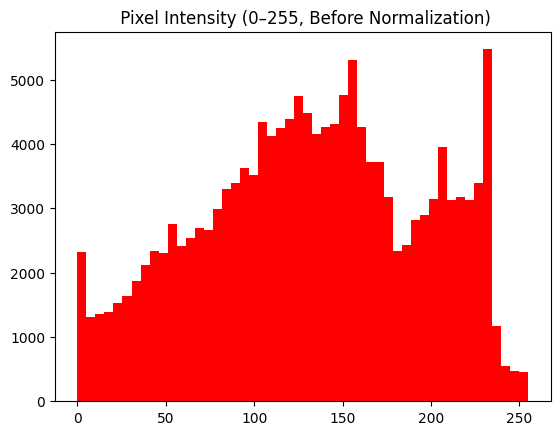

Processing WithoutMask: 100%|██████████| 1159/1159 [00:02<00:00, 424.76it/s]


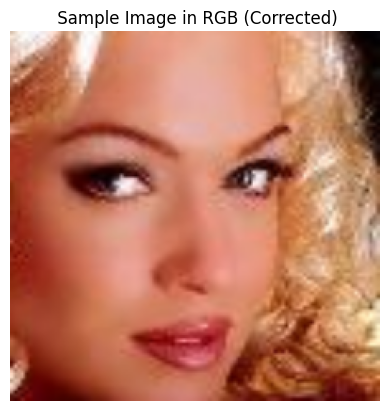

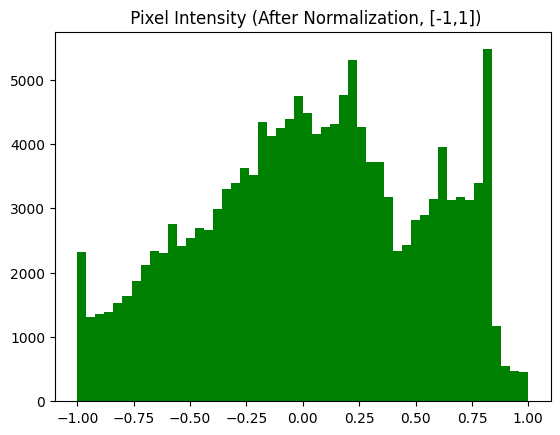

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import zipfile
import random
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


resized_path = "/kaggle/working/ResizedDataset"
final_path = "/kaggle/working/RGB&NormalizeDataset"
os.makedirs(final_path, exist_ok=True)


sample_category = random.choice(os.listdir(resized_path))
sample_folder = os.path.join(resized_path, sample_category)
sample_file = random.choice(os.listdir(sample_folder))
sample_path = os.path.join(sample_folder, sample_file)

bgr_img = cv2.imread(sample_path)


plt.imshow(bgr_img)
plt.title(" Sample Image in BGR (OpenCV Default)")
plt.axis("off")
plt.show()


plt.hist(bgr_img.ravel(), bins=50, color='red')
plt.title(" Pixel Intensity (0–255, Before Normalization)")
plt.show()

for category in os.listdir(resized_path):
    src_folder = os.path.join(resized_path, category)
    dst_folder = os.path.join(final_path, category)
    os.makedirs(dst_folder, exist_ok=True)

    for file in tqdm(os.listdir(src_folder), desc=f"Processing {category}"):
        file_path = os.path.join(src_folder, file)
        img = cv2.imread(file_path)

        if img is not None:
      
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            
            img_norm = preprocess_input(img_rgb.astype(np.float32))

       
            np.save(os.path.join(dst_folder, file.replace(".jpg", ".npy")), img_norm)


rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
norm_img = preprocess_input(rgb_img.astype(np.float32))

plt.imshow(rgb_img)
plt.title(" Sample Image in RGB (Corrected)")
plt.axis("off")
plt.show()


plt.hist(norm_img.ravel(), bins=50, color='green')
plt.title(" Pixel Intensity (After Normalization, [-1,1])")
plt.show()



# **Label Encoding & Shuffle Dataset**

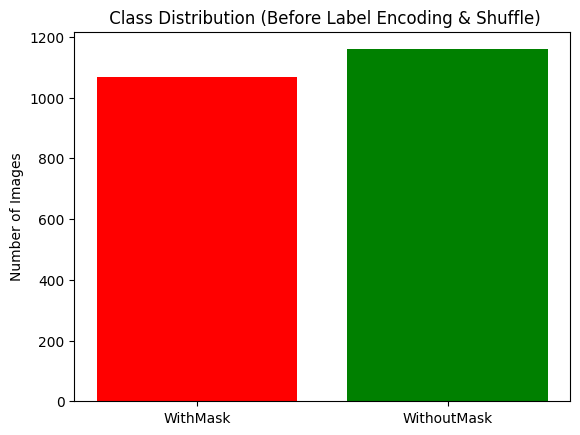

Before Label Encoding: {'WithMask': 1068, 'WithoutMask': 1159}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


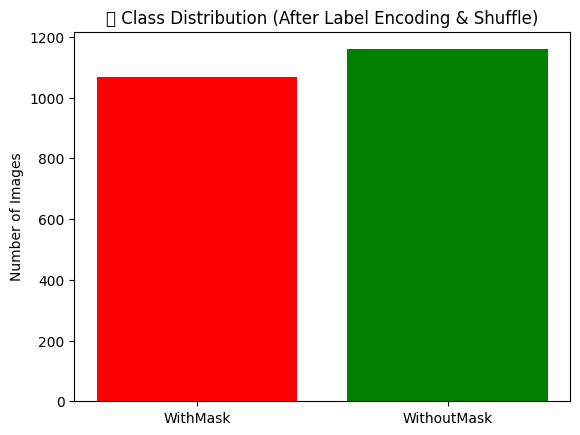

After Label Encoding & Shuffle: {'WithMask': 1068, 'WithoutMask': 1159}


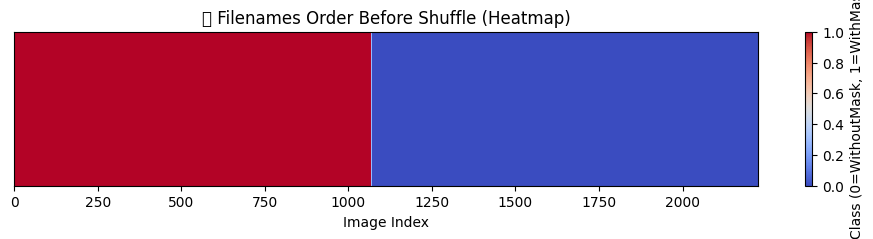

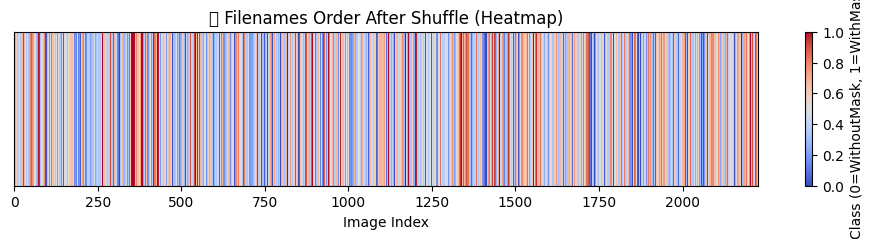

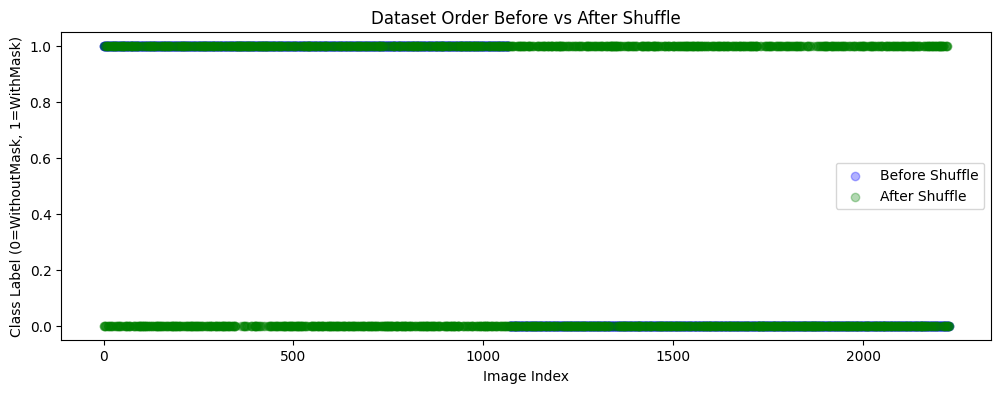

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import shutil
import zipfile


balanced_path = "/kaggle/working/RGB&NormalizeDataset"  
shuffled_path = "/kaggle/working/ShuffledDataset"
os.makedirs(shuffled_path, exist_ok=True)


labels_map = {"WithoutMask": 0, "WithMask": 1}


class_counts = {cat: len([f for f in os.listdir(os.path.join(balanced_path, cat)) if f.endswith(".npy")])
                for cat in os.listdir(balanced_path)}

plt.bar(class_counts.keys(), class_counts.values(), color=['red','green'])
plt.title(" Class Distribution (Before Label Encoding & Shuffle)")
plt.ylabel("Number of Images")
plt.show()
print("Before Label Encoding:", class_counts)


all_data = []
all_labels = []

for category in os.listdir(balanced_path):
    folder = os.path.join(balanced_path, category)
    files = [f for f in os.listdir(folder) if f.endswith(".npy")]
    for file in files:
        file_path = os.path.join(folder, file)
        all_data.append(file_path)
        all_labels.append(labels_map[category])


all_data = np.array(all_data)
all_labels = np.array(all_labels)


before_labels = all_labels.copy()


indices = np.arange(len(all_data))
np.random.shuffle(indices)
all_data = all_data[indices]
all_labels = all_labels[indices]


for i, file_path in enumerate(all_data):
    category_label = "WithoutMask" if all_labels[i]==0 else "WithMask"
    dst_folder = os.path.join(shuffled_path, category_label)
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(file_path, os.path.join(dst_folder, os.path.basename(file_path)))
    

shuffled_counts = {cat: len([f for f in os.listdir(os.path.join(shuffled_path, cat)) if f.endswith(".npy")])
                   for cat in os.listdir(shuffled_path)}

plt.bar(shuffled_counts.keys(), shuffled_counts.values(), color=['red','green'])
plt.title("📊 Class Distribution (After Label Encoding & Shuffle)")
plt.ylabel("Number of Images")
plt.show()
print("After Label Encoding & Shuffle:", shuffled_counts)


plt.figure(figsize=(12,2))
plt.imshow([before_labels], cmap="coolwarm", aspect="auto")
plt.title("📊 Filenames Order Before Shuffle (Heatmap)")
plt.yticks([])
plt.xlabel("Image Index")
plt.colorbar(label="Class (0=WithoutMask, 1=WithMask)")
plt.show()

plt.figure(figsize=(12,2))
plt.imshow([all_labels], cmap="coolwarm", aspect="auto")
plt.title("📊 Filenames Order After Shuffle (Heatmap)")
plt.yticks([])
plt.xlabel("Image Index")
plt.colorbar(label="Class (0=WithoutMask, 1=WithMask)")
plt.show()


indices = np.arange(len(all_labels))
plt.figure(figsize=(12,4))
plt.scatter(indices, before_labels, alpha=0.3, label="Before Shuffle", color="blue")
plt.scatter(indices, all_labels, alpha=0.3, label="After Shuffle", color="green")
plt.title("Dataset Order Before vs After Shuffle")
plt.xlabel("Image Index")
plt.ylabel("Class Label (0=WithoutMask, 1=WithMask)")
plt.legend()
plt.show()


# **Train / Validation / Test Split with Class Balance**

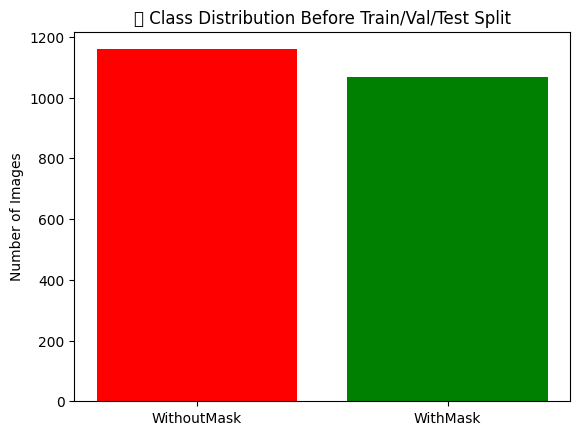

Overall class counts before split: {'WithoutMask': 1159, 'WithMask': 1068}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


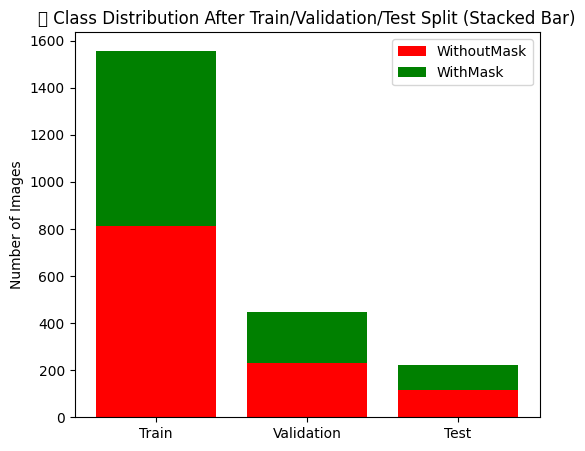

Train split counts (WithoutMask, WithMask): [811, 747]
Validation split counts (WithoutMask, WithMask): [232, 214]
Test split counts (WithoutMask, WithMask): [116, 107]

✅ Shapes after loading: 
X_train: (1558, 224, 224, 3) 
X_val: (446, 224, 224, 3) 
X_test: (223, 224, 224, 3)


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split


shuffled_path = "/kaggle/working/ShuffledDataset"  # input from Step 4
split_path = "/kaggle/working/TrainValTestSplit"
os.makedirs(split_path, exist_ok=True)


labels_map = {"WithoutMask": 0, "WithMask": 1}



all_files, all_labels = [], []

for category in os.listdir(shuffled_path):
    folder = os.path.join(shuffled_path, category)
    files = [f for f in os.listdir(folder) if f.endswith(".npy")]
    all_files.extend([os.path.join(folder, f) for f in files])
    all_labels.extend([labels_map[category]] * len(files))

all_files = np.array(all_files)
all_labels = np.array(all_labels)


unique, counts = np.unique(all_labels, return_counts=True)
plt.bar(["WithoutMask", "WithMask"], counts, color=['red', 'green'])
plt.title("📊 Class Distribution Before Train/Val/Test Split")
plt.ylabel("Number of Images")
plt.show()
print("Overall class counts before split:", dict(zip(["WithoutMask", "WithMask"], counts)))



X_temp, X_test, y_temp, y_test = train_test_split(
    all_files, all_labels, test_size=0.1, stratify=all_labels, random_state=42
)

val_ratio = 0.2 / (0.7 + 0.2)  
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_ratio, stratify=y_temp, random_state=42
)


splits = {
    "Train": (X_train, y_train),
    "Validation": (X_val, y_val),
    "Test": (X_test, y_test)
}

for split_name, (files, labels) in splits.items():
    for category in labels_map.keys():
        os.makedirs(os.path.join(split_path, split_name, category), exist_ok=True)

    for file, label in zip(files, labels):
        category = "WithoutMask" if label == 0 else "WithMask"
        dst_folder = os.path.join(split_path, split_name, category)
        shutil.copy(file, os.path.join(dst_folder, os.path.basename(file)))


def load_images(file_paths):
    return np.array([np.load(fp) for fp in file_paths])

X_train_data = load_images(X_train)
X_val_data   = load_images(X_val)
X_test_data  = load_images(X_test)


y_train_data = y_train
y_val_data   = y_val
y_test_data  = y_test


train_counts = [np.sum(y_train==0), np.sum(y_train==1)]
val_counts   = [np.sum(y_val==0), np.sum(y_val==1)]
test_counts  = [np.sum(y_test==0), np.sum(y_test==1)]

plt.figure(figsize=(6,5))
plt.bar("Train", train_counts[0], color='red', label='WithoutMask')
plt.bar("Train", train_counts[1], bottom=train_counts[0], color='green', label='WithMask')

plt.bar("Validation", val_counts[0], color='red')
plt.bar("Validation", val_counts[1], bottom=val_counts[0], color='green')

plt.bar("Test", test_counts[0], color='red')
plt.bar("Test", test_counts[1], bottom=test_counts[0], color='green')

plt.title("📊 Class Distribution After Train/Validation/Test Split (Stacked Bar)")
plt.ylabel("Number of Images")
plt.legend()
plt.show()

print("Train split counts (WithoutMask, WithMask):", train_counts)
print("Validation split counts (WithoutMask, WithMask):", val_counts)
print("Test split counts (WithoutMask, WithMask):", test_counts)
print("\n✅ Shapes after loading:",
      "\nX_train:", X_train_data.shape,
      "\nX_val:", X_val_data.shape,
      "\nX_test:", X_test_data.shape)


# **Data Augmentation**

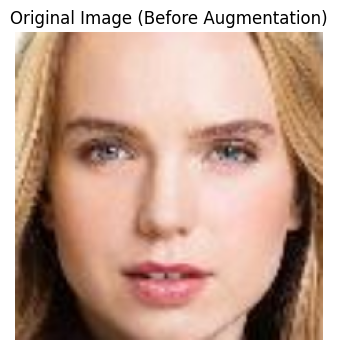

🔹 Augmenting and saving training images...


100%|██████████| 1558/1558 [01:02<00:00, 24.92it/s]


🔹 Saving validation and test images...

✅ All images saved at: /kaggle/working/FinalDataset
Found 3 augmented images for the selected sample in 'WithMask' folder


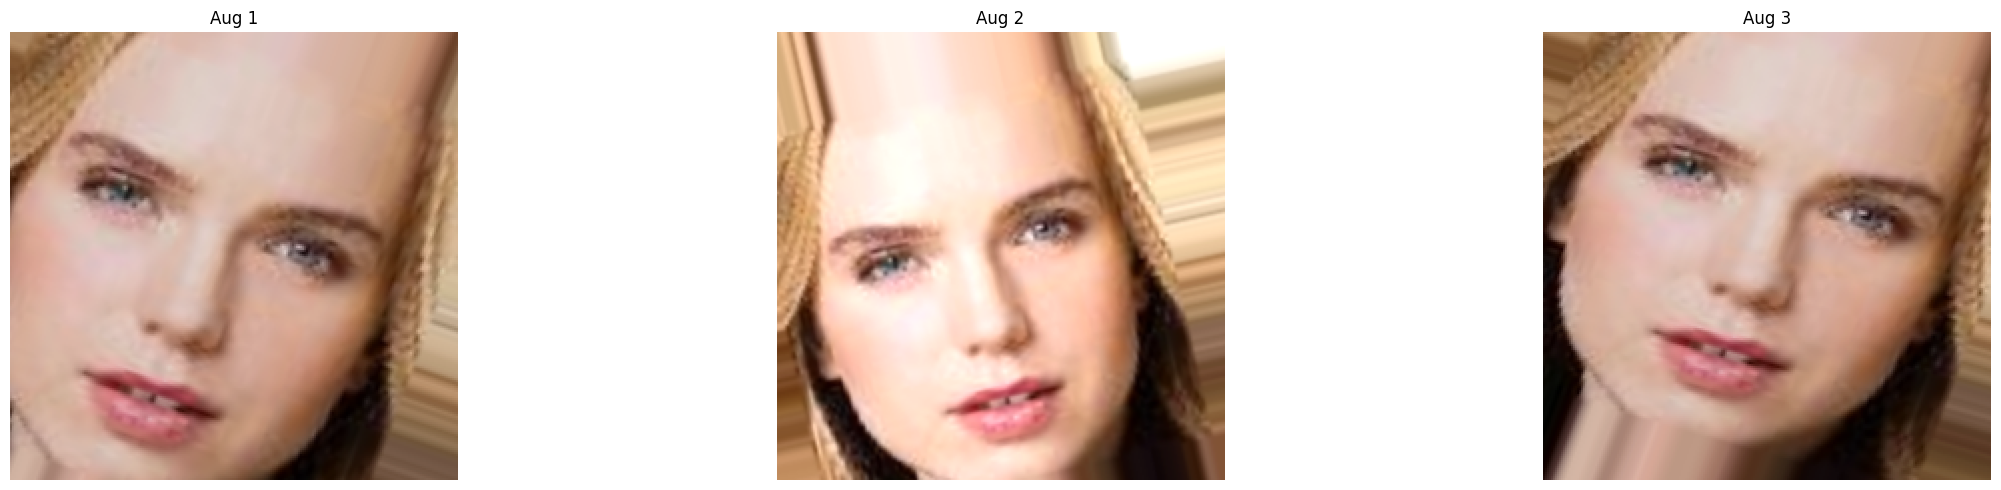

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


train_path = "/kaggle/working/TrainValTestSplit/Train/WithMask"
output_base = "/kaggle/working/FinalDataset"
splits = ["Train", "Validation", "Test"]
categories = ["WithMask", "WithoutMask"]


for split in splits:
    for category in categories:
        os.makedirs(os.path.join(output_base, split, category), exist_ok=True)



datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3


sample_index = 0
sample_file = X_train[sample_index]
sample_label = y_train[sample_index]
sample_category = categories[sample_label]

sample_img_data = np.load(sample_file)


sample_img_display = ((sample_img_data + 1.0) * 127.5).astype(np.uint8)

plt.figure(figsize=(4,4))
plt.imshow(sample_img_display)
plt.title("Original Image (Before Augmentation)")
plt.axis('off')
plt.show()


print("🔹 Augmenting and saving training images...")
for i in tqdm(range(len(X_train))):
    img_data = np.load(X_train[i])
    img = img_data.reshape((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    label = y_train[i]
    category = categories[label]

   
    for j, batch in enumerate(datagen.flow(img, batch_size=1)):
        save_path = os.path.join(output_base, "Train", category, f"img_{i}_aug{j}.npy")
        np.save(save_path, batch[0])  
        if j == 2:
            break


print("🔹 Saving validation and test images...")
for X_set, y_set, split_name in zip([X_val, X_test], [y_val, y_test], ["Validation", "Test"]):
    for j in range(len(X_set)):
        img_data = np.load(X_set[j])
        label = y_set[j]
        category = categories[label]
        save_path = os.path.join(output_base, split_name, category, f"img_{j}.npy")
        np.save(save_path, img_data)  

print(f"\n✅ All images saved at: {output_base}")



category_folder = os.path.join(output_base, "Train", sample_category)
base_prefix = f"img_{sample_index}_aug"

augmented_images = sorted([img for img in os.listdir(category_folder) if img.startswith(base_prefix)])
print(f"Found {len(augmented_images)} augmented images for the selected sample in '{sample_category}' folder")

plt.figure(figsize=(25, 5))
for i, img_name in enumerate(augmented_images[:3]):
    img_path = os.path.join(category_folder, img_name)
    img_data = np.load(img_path)
    
    
    img_display = ((img_data + 1.0) * 127.5).astype(np.uint8)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img_display)
    plt.title(f"Aug {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
import zipfile
import os

folder_path = "/kaggle/working/FinalDataset"
zip_path = "/kaggle/working/FinalDataset.zip"

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
        for file in files:
            abs_path = os.path.join(root, file)
            rel_path = os.path.relpath(abs_path, folder_path)
            zipf.write(abs_path, rel_path)

print("Zipping completed:", zip_path)


Zipping completed: /kaggle/working/FinalDataset.zip
